# FINAL PROJECT

Người thực hiện

    Họ tên: Nguyễn Đình Tuyên. MSSV: 1712888

    Họ tên: Đặng Đỗ Huỳnh Như. MSSV: 18120219

## Link github
https://github.com/dangdohuynhnhu2000/LTCKHDL-Final-Project

## Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Thu thập dữ liệu

- Dữ liệu trong file "data_scientist_salary.csv" được lấy trên kaggle mô tả về mức lương của nhà khoa học dữ liệu tại các bang của nước Mỹ. 

- License của dữ liệu là CC0: Public domain. Do đó, dữ liệu cho phép sử dụng.

- Dữ liệu được thu thập từ trang web GlassDoor bằng cách sử dụng trình quét Selenium.

## 2. Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
ds_salary_df = pd.read_csv('data_scientist_salary.csv')
ds_salary_df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


- Bỏ cột **index**, sử dụng theo index của pandas, vì theo quan sát ta thấy cột này chỉ chỉ mục của dòng nhưng lại không liên tục.

In [3]:
ds_salary_df = ds_salary_df.drop(columns = ['index'])

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

- Biến num_rows và num_columns chỉ số dòng và số cột của dữ liệu

In [4]:
num_rows = len(ds_salary_df)
num_columns = len(ds_salary_df.columns)
num_rows, num_columns

(742, 41)

- Dữ liệu có 742 dòng và 42 cột

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

- Mỗi dòng có thông tin về mức lương tối thiểu, mức lương tối đa, mô tả về công việc, công ty,... liên quan đến nhà khoa học dữ liệu. Theo quan sát sơ bộ và mô tả về dữ liệu thì không có dòng nào có ý nghĩa khác.

### Dữ liệu có các dòng bị lặp không?

- Biến duplicated_rows dùng để kiểm tra có dòng lặp hay không bằng phương thức duplicated của pandas, trả về True nếu bị lặp, ngược lại là False.

In [5]:
duplicated_rows = ds_salary_df.duplicated().any()
duplicated_rows

True

- Do dữ liệu có dòng bị lặp nên mình tiến hành loại bỏ các dòng bị lặp, chỉ giữ lại dòng đầu tiên.

In [6]:
ds_salary_df = ds_salary_df.drop_duplicates()
ds_salary_df.shape

(467, 41)

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả về các cột trong file "data_scientist_salary":
- **Job title**: Chức danh của công việc, ví dụ: Data scientist, junior data scientist, senior data scientist, ...
- **Salary Estimate**: Khoảng lương và nguồn lấy thông tin.
- **Job Description**: Mô tả chung về công việc, cho biết các yêu cầu kỹ năng mà công ty mong muốn và những việc mà người trúng tuyển sẽ đảm nhiệm.
- **Rating**: Điểm đánh giá cho công ty.
- **Company Name**: Tên công ty.
- **Location**: Địa điểm làm việc.
- **Headquarters**: Địa điểm trụ sở chính của công ty.
- **Size**: Quy mô nhân lực của công ty.
- **Founded**: Năm thành lập công ty. 
- **Type of ownership**: Cho biết đây là công ty tư nhân, đại chúng hay thuộc nhà nước. 
- **Industry**: Cho biết hoạt động kinh doanh của công ty thuộc ngành công nghiệp nào, ví dụ: công nghệ thông tin, công nghiệp dược phẩm, ... 
- **Sector**: Lĩnh vực mà công ty hoạt động.
- **Revenue**: Tổng số doanh thu hàng năm của công ty. 
- **Competitors**: Cho biết những đối thủ cạnh tranh hiện tại của công ty. 
- **Hourly**: Có giá trị 1 nếu mức lương được báo cáo theo giờ và có giá trị là 0 ở các trường hợp còn lại.
- **Employer provided**: Có giá trị là 1 nếu mức lương được cung cấp bởi nhà tuyển dụng và có giá trị là 0 ở các trường hợp còn lại.
- **Lower Salary**: Mức lương tối thiểu cho công việc này của công ty.
- **Upper Salary**: Mức lương tối đa cho công việc này của công ty.
- **Avg Salary(K)**: Mức lương trung bình cho công việc này của công ty (K ở đây là đơn vị nghìn).
- **company_txt**: Chứa tên công ty.
- **Job Location**: Tên viết tắt của vị trí công ty (bang).
- **Age**: Tuổi của công ty (tính theo năm).
- **Python -> google_an**: Có giá trị là 1 nếu công việc đòi hỏi kỹ năng ..., ngược lại có giá trị 0.
- **job_title_sim**: Tên đơn giản của chức danh công việc.
- **seniority_by_title**: Có chữ senior trong chức danh.
- **Degree**: Có giá trị M nếu công việc yêu cầu bằng cấp hoặc số năm kinh nghiệm; có giá trị P trong các trường hợp còn lại.

**Nhận xét**
- Ở đây có quá nhiều cột dữ liệu, vì vậy để dễ dàng theo dõi và nhận xét thì ta sẽ bỏ bớt các cột không cần thiết ví dụ như:
    - Bỏ các cột có thông tin ngoài lề như: **Headquarters**(vị trí trụ sở), **Competitors**(Đối thủ cạnh tranh của cty), **Hourly**(lương theo giờ hay không), **Employer provided**(thông tin do nhân viên cung cấp hay không).
    - Bỏ cột trùng dữ liệu: **company_txt**(tên của công ty) trùng với Company Name.

In [7]:
ds_salary_df = ds_salary_df.drop(columns = ['Headquarters','Competitors','Hourly', \
                                            'Employer provided','company_txt'])
ds_salary_df.shape

(467, 36)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

- Dùng chức năng dtypes để xem kiểu dữ liệu của các cột.

In [8]:
col_dtypes = ds_salary_df.dtypes
col_dtypes

Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop                  int64
tableau                 int64
bi                      int64
flink                   int64
mongo                   int64
google_an               int64
job_title_

- Các cột có kiểu dữ liệu đã phù hợp ngoại trừ cột **Founded**: dùng để chỉ năm thành lập của công ty, nên chuyển thành datetime với format là '%Y'.
- Tuy nhiên khi xử lý sẽ gặp lỗi bởi vì các giá trị thiếu được điền là '-1'. Vì vậy để dễ xử lý ta cần thay đổi các giá trị '-1' thành np.NaN.

In [9]:
ds_salary_df = ds_salary_df.replace(-1, np.NaN)
ds_salary_df['Founded'] = pd.to_datetime(ds_salary_df['Founded'],format = '%Y')
ds_salary_df['Founded'].head()

0   1973-01-01
1   1984-01-01
2   2010-01-01
3   1965-01-01
4   1998-01-01
Name: Founded, dtype: datetime64[ns]

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?
(tính tỉ lệ các giá trị thiếu, min/max của các cột có kiểu dữ liệu dạng số)

Vì các cột từ Python -> google_an: chỉ gồm 1 nếu công việc yêu cầu skill này hoặc ngược lại là 0 cho nên ta không cần xét sự phân bố các cột này. Các cột có kiểu dữ liệu dạng số (numerical) cần xét còn lại là: **"Rating", "Lower Salary", "Upper Salary", "Avg Salary(K)", "Age"**. 

Với mỗi cột này ta tính phần trăm các giá trị thiếu, min, max bằng cách dùng cấu trúc agg để tổng hợp các tính năng tính giá trị trong mỗi cột.

In [10]:
numerical_df = ds_salary_df[["Rating", "Lower Salary", "Upper Salary", "Avg Salary(K)", "Age"]]
def missing_ratio(x):
    return x.isna().mean() * 100

numerical_df = numerical_df.agg([missing_ratio, pd.Series.min, pd.Series.max])
numerical_df

,Rating,Lower Salary,Upper Salary,Avg Salary(K),Age
missing_ratio,1.498929,0.0,0.0,0.0,7.066381
min,1.900000,15.0,16.0,15.5,2.000000
max,5.000000,202.0,306.0,254.0,277.000000


- Ta có thể thấy min/max các cột không có gì bất thường, ngoại trừ Age của 1 công ty có tuổi '277'?

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?
(tính tỉ lệ các giá trị thiếu, số lượng các giá trị khác nhau, show một vài giá trị)

Theo như quan sát và tìm hiểu dữ liệu thì các cột categorical của dữ liệu trên sẽ là các cột có dtypes là object.

Tuy nhiên: 
- Ở các cột **seniority_by_title**, **Degree** thì các giá trị thiếu được điền là na -> cần chuyển thành np.NaN để có thể hoạt động tốt trên các hàm của pandas.
- Ở cột **Revenue** thì các giá trị thiếu được điền là Unknown -> cần chuyển thành np.NaN

In [11]:
ds_salary_df = ds_salary_df.replace(['na', 'Unknown / Non-Applicable'], np.NaN)

In [12]:
columns_cate = list(ds_salary_df.dtypes[ds_salary_df.dtypes == 'object'].index)
categorical_df = ds_salary_df[columns_cate]
def diff_vals(s):
    return s.dropna().unique()
def num_diff_vals(s):
    return s.nunique()
categorical_df = categorical_df.agg([missing_ratio,num_diff_vals,diff_vals])
categorical_df

,Job Title,Salary Estimate,Job Description,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Job Location,job_title_sim,seniority_by_title,Degree
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.69379,0.0,1.284797,72.805139,52.462527
num_diff_vals,264,416,463,343,200,8,9,60,25,12,37,9,2,2
diff_vals,"[Data Scientist, Healthcare Data Scientist, Re...","[$53K-$91K (Glassdoor est.), $63K-$112K (Glass...","[Data Scientist\nLocation: Albuquerque, NM\nEd...","[Tecolote Research\n3.8, University of Marylan...","[Albuquerque, NM, Linthicum, MD, Clearwater, F...","[501 - 1000 , 10000+ , 1001 - 5000 , 51 - 200 ...","[Company - Private, Other Organization, Govern...","[Aerospace & Defense, Health Care Services & H...","[Aerospace & Defense, Health Care, Business Se...","[$50 to $100 million (USD), $2 to $5 billion (...","[NM, MD, FL, WA, NY, TX, CA, VA, MA, NJ, CO, I...","[data scientist, other scientist, analyst, dat...","[sr, jr]","[M, P]"


## 3. Đưa ra các câu hỏi có ý nghĩa cần trả lời

### Câu hỏi 1: 
***Các kĩ năng cần thiết của các công việc trong lĩnh vực khoa học dữ liệu là gì? Các công việc nào có lương trung bình cao nhất?***

- Trả lời được có lợi ích gì?

Liên quan đến lĩnh vực khoa học dữ liệu cần có rất nhiều kĩ năng, tuy nhiên tùy vào mỗi công việc mà mình chọn thì chỉ nên tập trung vào các kĩ năng cần thiết. Vì vậy việc lọc các kĩ năng yêu cầu của từng công việc sẽ giúp người học có cái nhìn tổng quát và lựa chọn kĩ năng để có thể phù hợp với công việc đó. Ví dụ như công việc data scientist: mình sẽ nên học python, exel hay sql,... để phục vụ công việc chứ không nên học tất cả, còn data analyst thì sẽ có các yêu cầu kĩ năng khác.

Bên cạnh đó, cũng biết được mức lương trung bình của các công việc thuộc lĩnh vực khoa học dữ liệu, người đọc có thể lựa chọn công việc mình theo đuổi rồi chuẩn bị các skill mà công việc yêu cầu.

### Câu hỏi 2:

***Những ngành công nghiệp nào tuyển nhiều vị trí liên quan đến khoa học dữ liệu nhất nhất? Liệu mức lương ở các ngành này có khác nhau và đâu là top các ngành có mức lương cao nhất?***

- Trả lời được có lợi ích gì?

Các công việc liên quan đến khoa học dữ liệu không chỉ đòi hỏi nhà khoa học dữ liệu phải có kiến thức chuyên môn về khoa học dữ liệu mà còn đòi hỏi sự hiểu biết về dữ liệu trong lĩnh vực cụ thể mà họ đang nghiên cứu. Do đó, việc tìm hiểu xem các ngành nào tuyển nhiều vị trí liên quan dến khoa học dữ liệu và khám phá sự chênh lệch mức lương ở các ngành có thể giúp người học đưa ra định hướng nghề nghiệp phù hợp trong tương lai. (Ví dụ: nếu muốn làm việc trong lĩnh vực y tế, người học KHDL có thể tìm học các khóa học về xử lý dữ liệu trong ngành y).

Ngoài ra, phân tích còn cung cấp một cái nhìn tổng quan về thực trạng ứng dụng khoa học dữ liệu vào các ngành công nghiệp và đời sống.

### Câu hỏi 3:

***Phân bố việc làm khoa học dữ liệu ở mỗi bang như thế nào? Đâu là top các bang và thành phố có nhiều việc làm liên quan đến khoa học dữ liệu nhất?***

- Trả lời được có lợi ích gì?

Việc tìm ra các bang có phân bố việc làm liên quan đến KHDL lớn nhất có thể giúp cho người tìm việc đưa ra quyết định phù hợp về nơi mà họ sẽ định cư. Ví dụ, khi một nhà KHDL muốn chuyển công ty do muốn học hỏi thêm hoặc do không phù hợp với công ty hiện tại, nếu nhà KHDL này ở một bang có nhiều việc làm KHDL, việc chuyển đổi này sẽ diễn ra dễ dàng hơn.

Vì phạm vi của mỗi bang là rất lớn, để thu hẹp hơn, ta đồng thời tìm ra top các thành phố mà có nhiều việc làm về KHDL nhất ở mỗi bang.

## 4. Tiền xử lý và phân tích dữ liệu để trả lời các câu hỏi

## Câu hỏi 1: 
***Các kĩ năng cần thiết của các công việc trong lĩnh vực khoa học dữ liệu là gì? Top các công việc có lương trung bình cao nhất?*** 

### Phân tích dữ liệu
#### Các kĩ năng cần thiết của các công việc trong lĩnh vực khoa học dữ liệu là gì?
Trong dữ liệu trên, có các cột skill như Python, sql, excel, mongo,... khi nào công việc yêu cầu thì giá trị sẽ là 1, ngược lại sẽ là 0. Do đó để trả lời câu hỏi ta cần các bước sau:
- Bước 1: Gom nhóm các đối tượng theo job title sim, rồi đếm tổng các giá trị của cột skill ứng với từng đối tượng.
- Bước 2: Chuẩn hóa các hàng theo giá trị lớn nhất trong mỗi hàng. Từ kết quả này vẽ biểu đồ heatmap để thể hiện thông tin.

Code bước 1

In [13]:
#Lấy các cột có kiểu dữ liệu là int và float.
numerical_name = ds_salary_df.select_dtypes(include={'int64','float64'}).columns.tolist()

#Skill names sẽ là tên các cột ở trên ngoại trừ các cột numerical_df đã xác định ở trước
skill_names = list(set(numerical_name) - set(numerical_df.columns.tolist()))

#gom nhóm theo job title, rồi tính tổng các cột trong skill name
job_skills = ds_salary_df.groupby('job_title_sim')[skill_names].sum()
job_skills

,aws,Python,keras,spark,excel,tensor,pytorch,scikit,bi,sas,flink,sql,tableau,hadoop,mongo,google_an
job_title_sim,,,,,,,,,,,,,,,,
Data scientist project manager,2,3,0,0,6,0,0,0,1,0,0,5,5,0,0,0
analyst,8,22,0,4,54,0,0,0,13,5,0,53,27,2,2,5
data analitics,0,4,0,0,2,0,0,0,1,1,0,3,3,0,0,0
data engineer,35,48,0,42,35,1,0,0,3,1,5,56,9,32,8,0
data modeler,2,1,0,1,3,0,0,0,1,0,0,3,0,1,0,0
data scientist,49,163,19,59,105,41,20,33,19,34,3,121,52,41,13,3
director,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
machine learning engineer,4,10,0,2,4,5,3,4,0,0,0,7,0,2,0,0
other scientist,8,6,0,0,35,1,1,0,0,1,0,2,0,0,0,0


Code bước 2

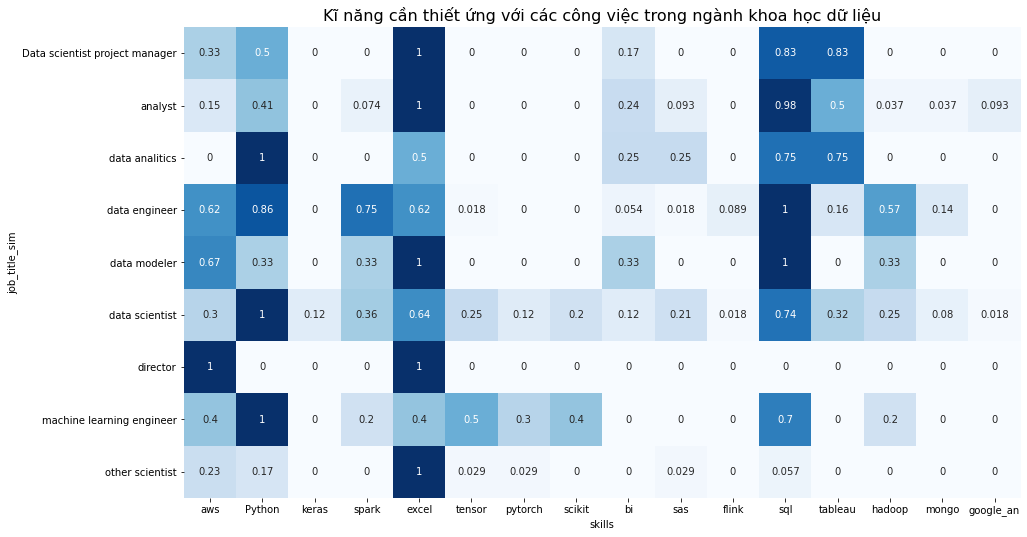

In [14]:
#Chuẩn hóa các giá trị theo max của từng hàng
job_skills_normalize = job_skills.div(job_skills.max(axis=1), axis=0)

#Vẽ biểu đồ heatmap để thể hiện
plt.figure(figsize=(15, 15))
sns.heatmap(job_skills_normalize, vmin=0, vmax=1, square=True, annot=True, cbar=False, cmap='Blues')
plt.title('Kĩ năng cần thiết ứng với các công việc trong ngành khoa học dữ liệu',size=16)
plt.xlabel('skills');

- Theo như quan sát sơ bộ thì các công việc trong lĩnh vực khoa học dữ liệu đa số đều cần các kĩ năng như **python, excel, sql** (với tỉ lệ cao nhất = 1 rất nhiều). Tuy nhiên ta cũng có thể dễ dàng theo dõi từng công việc như sau:
    - **Data analytst** thì cần nhiều nhất là python, sql, tableau,...
    - **Data engineer** thì lại cần sql, python, spark, aws, excel,hadoop
    - **Data modeler** cần excel, sql, aws,...
    - **Data scientist** cần nhiều nhất là python, sql, exel, spark,...
    -...
    
Ta thấy có rất nhiều skill về lĩnh vực khoa học dữ liệu vì vậy ta không thể nào học hết tất cả được. Do đó tùy vào công việc mình muốn theo đuổi mà mình nên học chuyên sâu tìm hiểu một số skill chính để đáp ứng yêu cầu công việc tốt nhất.

#### Bên cạnh việc tìm hiểu các kĩ năng, người học cũng quan tâm rất nhiều về mức lương, vậy top các công việc có mức lương cao nhất trong lĩnh vực khoa học dữ liệu là gì?

Để trả lời câu hỏi, ta thực hiện các bước sau:
- Bước 1: Gom nhóm các đối tượng theo công việc(job title sim) rồi tính trung bình về mức lương.
- Bước 2: Vẽ biểu đồ barh thể hiện.

Code bước 1

In [15]:
#Gom nhóm công việc rồi tính lương trung bình, sau đó sort theo giá trị giảm dần.
job_salary_avg = ds_salary_df.groupby('job_title_sim')['Avg Salary(K)'].mean()
job_salary_avg = job_salary_avg.sort_values(ascending = False)
job_salary_avg

job_title_sim
director                          137.666667
machine learning engineer         128.045455
data scientist                    116.336493
data engineer                     102.866667
other scientist                    90.905405
data modeler                       84.000000
Data scientist project manager     74.562500
data analitics                     72.500000
analyst                            68.428571
Name: Avg Salary(K), dtype: float64

Code bước 2

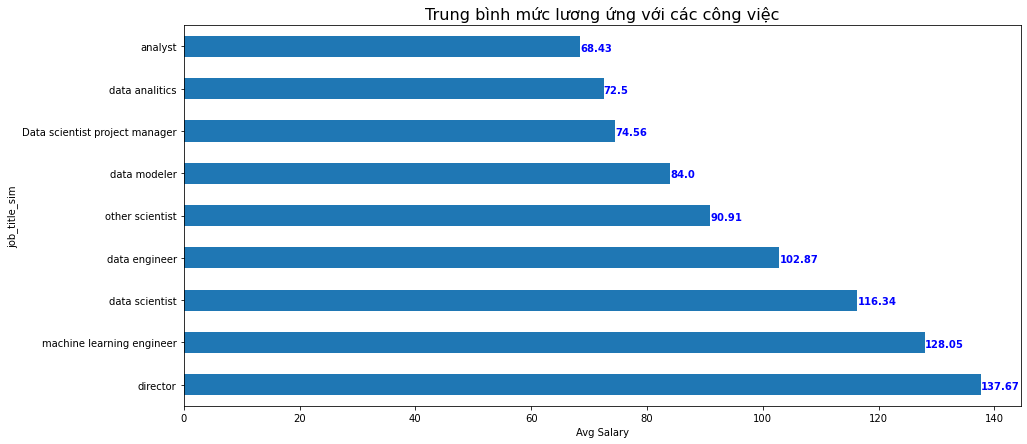

In [16]:
#Vẽ biểu đồ barh để quan sát, điền thêm các giá trị của từng cột.
plt.figure(figsize=(15, 7))
ax = job_salary_avg.plot.barh()
list_values = list(job_salary_avg.values.round(2))
for i, v in enumerate(list_values):
    ax.text(v, i - 0.1, str(v), color='blue', fontweight='bold')
plt.title('Trung bình mức lương ứng với các công việc', size=16)
plt.xlabel('Avg Salary');

Không có gì bất ngờ khi director là công việc có lương trung bình cao nhất (137,67 K$). Tiếp theo là các công việc như machine learning engineer(128,05 K), data scientist(116,34 K), ... hoặc công việc có mức lương trung bình thấp nhất là analyst, data analyst.

***Qua các phân tích ở trên ta biết được mức lương trung bình của các công việc cũng như các kĩ năng yêu cầu của các công việc này. Từ đó dễ dàng lựa chọn công việc cũng như các kĩ năng mà công việc yêu cầu để có thể tập trung chuyên sâu.***

## Câu hỏi 2:

***Những ngành công nghiệp nào tuyển nhiều vị trí liên quan đến khoa học dữ liệu nhất? Liệu mức lương ở các ngành này có khác nhau và đâu là top các ngành có mức lương cao nhất?***

### Tiền xử lý

- Tạo ra một dataframe mới từ các cột Lower Salary, Upper Salary, Avg Salary(K), Industry để phục vụ cho việc phân tích và đưa ra câu trả lời.

In [17]:
sub_df = ds_salary_df[["Lower Salary", "Upper Salary", "Avg Salary(K)", "Industry"]]
sub_df.head(3)

,Lower Salary,Upper Salary,Avg Salary(K),Industry
0,53,91,72.0,Aerospace & Defense
1,63,112,87.5,Health Care Services & Hospitals
2,80,90,85.0,Security Services


### Phân tích dữ liệu

#### Top 5 ngành tuyển dụng nhiều vị trí liên quan đến khoa học dữ liệu nhất và biểu đồ tỉ lệ giữa chúng.

Các bước thực hiện:

- Bước 1: Tính số lượng việc làm ở mỗi ngành và sắp xếp theo thứ tự giảm dần lưu vào biến num_jobs_per_industry, sau đó lấy ra top 5 ngành có số lượng việc làm nhiều nhất lưu vào biến top5_ratio.
- Bước 2: Tính tỉ lệ số công việc ở mỗi ngành bằng cách chia số việc làm ở mỗi ngành trong top 5 cho tổng số việc làm của cả 5 ngành và lưu vào biến top5_ratio. Sau đó vẽ biểu đồ tròn thể hiện tỉ lệ giữa chúng.

Code bước 1

In [18]:
num_jobs_per_industry = sub_df["Industry"].value_counts()

#lấy ra top 5 ngành tuyển dụng nhiều vị trí liên quan đến khdl nhất
top5 = num_jobs_per_industry[:5]

Code bước 2

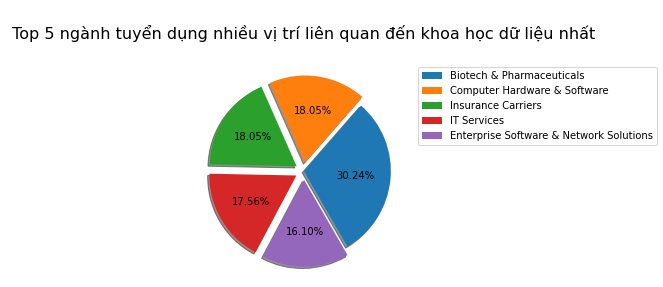

In [19]:
#tính tỉ lệ số công việc ở mỗi ngành
top5_ratio = top5 / top5.sum() * 100

#vẽ biểu đồ tròn để minh họa
my_explode=(0,0.1,0.1,0.1,0.1)
plt.pie(top5_ratio, autopct='%1.2f%%',explode=my_explode, shadow=True,startangle=300)
plt.title('\n Top 5 ngành tuyển dụng nhiều vị trí liên quan đến khoa học dữ liệu nhất \n', size=16, color='black')
plt.legend(labels=list(top5_ratio.index), bbox_to_anchor=(1,1))
plt.show()

Kết quả khá bất ngờ khi một ngành không thuộc lĩnh vực IT là Biotech & Pharmaceuticals (công nghệ sinh học & dược phẩm) chiếm tỉ trọng lớn nhất và lớn hơn nhiều so với các ngành còn lại. Hai ngành xếp thứ 2 là Insurance Carriers (Bảo hiểm) và Computer Hardware & Software (Phần mềm và phần cứng máy tính). Tiếp theo, xếp hạng 3 là ngành IT services (dịch vụ công nghệ thông tin) và xếp thứ 4 là ngành Enterprise Software & Network Solutions (phần mềm doanh nghiệp và giải pháp mạng). Ta cũng thấy rằng các ngành xếp từ thứ 2 trở đi không chênh lệch nhau là bao.

#### Top 5 ngành có mức lương khoa học dữ liệu cao nhất

Các bước thực hiện:

- Bước 1: Tính mức lương trung bình ở mỗi nhóm ngành bằng cách tính trung bình của cột Avg Salary(K) và lưu vào biến mean_vals.
- Bước 2: Khảo sát sự chênh lệch mức lương giữa top 5 ngành tuyển dụng hiều vị trí liên quan đến KHDL nhất và mình họa bằng biểu đồ cột nhóm với ba giá trị mức lương tối thiểu (Lower Salary), mức lương trung bình (Avg Salary), mức lương tối đa (Upper Salary).
- Bước 3: Tìm top 5 ngành có mức lương cao nhất (so sánh theo mức lương trung bình) trong số tất cả các ngành có mặt trong bộ dữ liệu và vẽ biểu đồ cột nhóm để minh họa như bước 2.

Code bước 1:

In [20]:
#với mỗi ngành, tính giá trị trung bình (mean) cho mức lương tối thiểu, mức lương tối đa và mức lương trung bình
mean_vals = sub_df[["Industry", "Lower Salary", "Avg Salary(K)", "Upper Salary"]].groupby("Industry").mean()

Code bước 2:

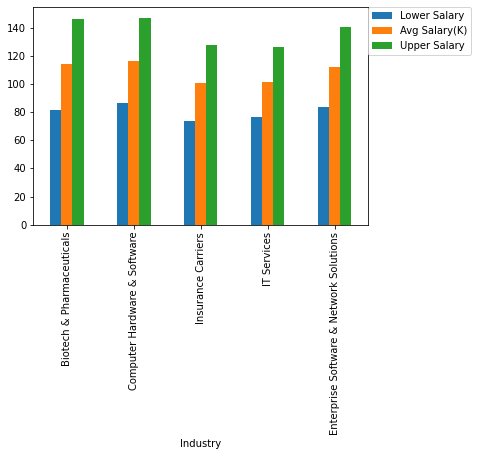

In [21]:
#Lấy ra các giá trị tương ứng với 5 công ty trong top5
top5_with_salary = mean_vals.loc[list(top5.index), :]

axes = top5_with_salary.plot.bar()
axes.legend(loc=(1,0.78)) 

Kết quả cho thấy ngành Computer Hardware & Software có mức lương cao nhất (xét trên cả ba giá trị tối thiểu, trung bình và tối đa) trong nhóm top 5 ngành ở trên. Ngành Biotech & Pharmaceuticals cũng có mức lương khá cao, chỉ kém ngành Computer Hardware & Software một ít. Ta cũng thấy rằng mặc dù nằm trong top 3 ngành có việc làm liên quan đến KHDL nhiều nhất nhưng ngành Insurance Carriers lại có mức lương kém hơn nhiều so với 2 ngành còn lại trong top 3, trong khi ngành Enterprise Software & Network Solution lại có mức lương khá cao (gần bằng mức lương của 2 ngành có mức lương cao nhất).

Code bước 3:

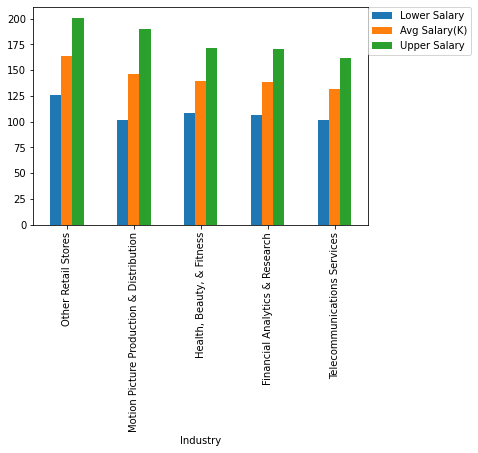

In [22]:
#sắp xếp lại theo mức lương trung bình giảm dần
mean_vals = mean_vals.sort_values(by="Avg Salary(K)", ascending=False)

#Lấy ra 5 công ty có mức lương trung bình cao nhất
top5_general = mean_vals[:5]

axes = top5_general.plot.bar()
axes.legend(loc=(1,0.78))

Kết quả khá bất ngờ khi không có ngành nào trong số top 5 ngành tuyển dụng nhiều nhất nằm trong top 5 ngành có mức lương cao nhất. Một câu hỏi được đặt ra là số lượng việc làm KHDL ở 5 ngành có mức lương cao nhất này là bao nhiêu.

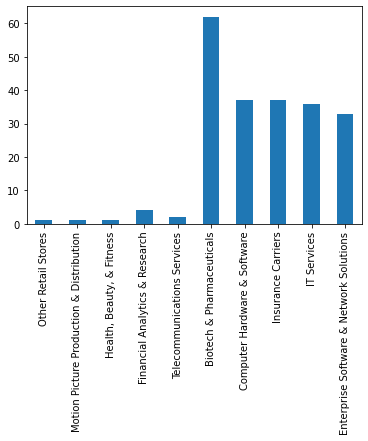

In [23]:
num_jobs_per_industry = sub_df["Industry"].value_counts()

#lấy ra số việc làm ở 5 ngành có mức lương cao nhất
num_jobs = num_jobs_per_industry.loc[list(top5_general.index)]

#thêm vào dữ liệu của 5 ngành có số việc làm cao nhất để tiện quan sát
num_jobs = num_jobs.append(top5)

axes = num_jobs.plot.bar()

Ta thấy rằng số việc làm KHDL ở 5 ngành này là ít hơn rất nhiều so với các ngành trong top 5 ngành tuyển dụng KHDL nhiều nhất. Do đó, người tìm việc cần hết sức cẩn trọng và cân nhắc trước khi lựa chọn lĩnh vực mà mình muốn làm việc.

## Câu hỏi 3:

***Phân bố việc làm khoa học dữ liệu ở mỗi bang như thế nào? Đâu là top các bang và thành phố có nhiều việc làm liên quan đến khoa học dữ liệu nhất?***

### Tiền xử lý
Các bước thực hiện:
- Lấy ra cột Location là cột chứa dữ liệu cần để trả lời câu hỏi. Tuy nhiên, cột Location là tổ hợp của 2 thông tin gồm tên thành phố (hoặc thị trấn, ta xem như là tên thành phố) và tên bang. Do đó, ta cần tách cột Location ra thành 2 cột tên thành phố (City) và tên bang (State).

In [24]:
#lấy ra cột Location và thực hiện tách cột
sub_df = ds_salary_df["Location"]
sub_df = sub_df.str.split(pat=", ", expand=True)
sub_df.head(3)

,0,1,2
0,Albuquerque,NM,None
1,Linthicum,MD,None
2,Clearwater,FL,None


Cột Location chỉ chứa 2 thông tin là tên thành phố (hoặc tên thị trấn) và tên bang, nhưng kết quả số cột sau khi tách ra từ cột Location lại là 3. Để tìm hiểu điều này, ta in ra tất cả các giá trị khác nhau trong cột thứ 3 này.

In [25]:
sub_df[2].unique()

array([None, 'CA'], dtype=object)

Kết quả cho thấy ngoài các giá trị None, cột này có xuất hiện giá trị "CA". Do đó, ta sẽ tìm tất cả các dòng có giá trị "CA" ở cột thứ 3 này.

In [26]:
sub_df[sub_df[2]=="CA"]

,0,1,2
126,Santa Fe Springs,Los Angeles,CA


Nguyên nhân do Santa Fe Springs là một thành phố nhỏ trong một thành phố lớn hơn là Los Angeles. Để xử lý ngoại lệ này, ta lựa chọn lấy tên thành phố là Los Angeles (vì các dòng dữ liệu khác cũng để tên thành phố là Los Angeles thay vì tên các thành phố nhỏ).

In [27]:
#xóa cột thứ 3 chứa toàn giá trị None
sub_df = sub_df.drop([2], axis=1)

#đổi tên các cột thành "City" và "State"
sub_df.rename(columns={0: "City", 1: "State"}, inplace=True)

#đổi giá trị City và State ở dòng 126 thành Los Angeles và CA
sub_df.iloc[126] = ["Los Angeles", "CA"]

### Phân tích dữ liệu

#### Các bang nào có số lượng việc làm liên quan đến KHDL cao nhất?

Để trả lời câu hỏi, ta thực hiện các bước sau:
- Bước 1: Đếm số lượng việc làm ở mỗi bang và sắp xếp theo giá trị giảm dần, sau đó lấy ra top 5 bang có số lượng việc làm cao nhất.
- Bước 2: Tính tỉ trọng của mỗi bang bằng cách lấy số việc làm ở mỗi bang chia cho tổng số việc làm ở cả 5 bang. Vẽ biểu đồ tròn để minh họa.

Code bước 1:

In [28]:
#lấy ra top5
top5_states = sub_df.groupby("State").size().sort_values(ascending=False)[:5]

Code bước 2:

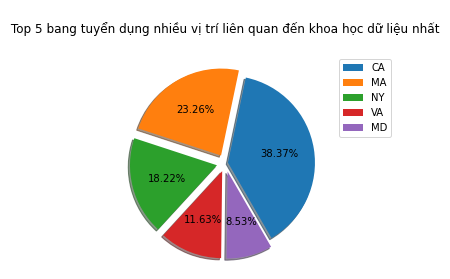

In [29]:
#tính tỉ lệ giữa các bang trong top 5 
top5_ratio = top5_states / top5_states.sum() * 100

#vẽ biểu đồ tròn để minh họa
my_explode=(0.03, 0.1,0.1,0.1,0.1)
plt.pie(top5_ratio, autopct='%1.2f%%',explode=my_explode, shadow=True,startangle=300)
plt.title('\n Top 5 bang tuyển dụng nhiều vị trí liên quan đến khoa học dữ liệu nhất \n', size=12, color='black')
plt.legend(labels=list(top5_ratio.index), bbox_to_anchor=(1,1))
plt.show()

Kết quả cho thấy 5 bang tuyển dụng nhiều vị trí liên quan đến KHDL nhất lần lượt là California (CA), Massachusetts (MA), New York (NY), Virginia (VA) và Illinois (IL). Trong đó, 2 bang CA và MA chiếm tỉ trọng lớn hơn hẳn các bang còn lại.

#### Ở mỗi bang, các thành phố nào có nhiều việc làm liên quan đến khoa học dữ liệu nhất?

Để trả lời câu hỏi, ta thực hiện các bước sau:
- Bước 1: Lấy ra các dòng dữ liệu có tên bang nằm trong top 5 bang có nhiều việc làm nhất và lưu vào biến top5_df.
- Bước 2: Tính số lượng việc làm của mỗi thành phố thuộc các bang này, sau đó lọc ra 3 thành phố có nhiều việc làm nhất ở mỗi bang và lưu vào biến top_cities_states.
- Bước 3: Vẽ biểu đồ cột minh họa sự chênh lệch số lượng việc làm ở mỗi thành phố.

Code bước 1:

In [30]:
#lấy ra các dòng có tên bang nằm trong top 5 bang
top5_df = sub_df[sub_df["State"].isin(list(top5_states.index))]

Code bước 2:

In [31]:
#tính số lượng việc làm ở mỗi thành phố
top5_df = top5_df.groupby(["State", "City"]).size().reset_index(name="Counts")

#lấy ra 3 thành phố có nhiều việc làm nhất ở mỗi bang
top_cities_states = top5_df.groupby("State").apply(lambda x: (x.sort_values("Counts", ascending=False)).head(3))
top_cities_states = top_cities_states.reset_index(drop=True)
top_cities_states

,State,City,Counts
0,CA,San Francisco,34
1,CA,San Jose,8
2,CA,South San Francisco,5
3,MA,Cambridge,28
4,MA,Boston,13
5,MA,Marlborough,3
6,MD,Rockville,5
7,MD,Gaithersburg,4
8,MD,Baltimore,2
9,NY,New York,37


Ta thấy các thành phố có nhiều việc làm nhất ở các bang CA, IL, MA, NY và VG lần lượt là San Francisco, Chicago, Cambridge, New York và Herndon.

Code bước 3:

<AxesSubplot:xlabel='City'>

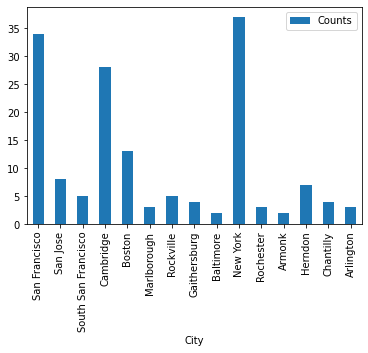

In [32]:
#vẽ biểu đồ cột số lượng việc làm ở mỗi thành phố
top_cities = top_cities_states[["City", "Counts"]]
top_cities = top_cities.set_index("City")
top_cities.plot.bar()

Ta thấy 5 thành phố New York, San Francisco, Cambridge, Chicago và Boston có số lượng việc làm nổi bật hơn nhiều so với các thành phố còn lại. Ngoài ra, biểu đồ còn cho thấy bang MA có đến 2 thành phố nằm trong top 5, thành phố Boston của bang này có số lượng việc làm lớn hơn nhiều so với thành phố có nhiều việc làm nhất bang IL là Herndon. 

Vậy trong top 5 thành phố có nhiều việc làm nhất (xét trên toàn bộ dữ liệu), liệu có thành phố nào không nằm trong nhóm 15 thành phố ở trên không?

In [33]:
#Tính số lượng việc làm ở mỗi thành phố
top_cities_general = sub_df.groupby("City").size().reset_index(name="Counts")

#sắp xếp số lượng việc làm theo thứ tự giảm dần và lấy ra top 5 thành phố
top_cities_general = top_cities_general.sort_values(by="Counts", ascending=False)
top_cities_general[:5]

,City,Counts
118,New York,37
159,San Francisco,34
28,Cambridge,29
37,Chicago,18
24,Boston,13


Kết quả cho thấy top 5 thành phố có nhiều việc làm nhất cũng chính là các thành phố trong top 5 thành phố có nhiều việc làm nhất ở 5 bang. Điều này hoàn toàn hợp lý khi nhìn vào biểu đồ cột ở trên, ta thấy tổng số việc làm của cả 3 thành phố Herndon, Chantilly, Arlington của bang VA (bang cuối cùng trong top 5) cũng mới chỉ nhỉnh hơn một chút so với thành phố Boston (thành phố cuối cũng trong top 5). Do đó, sẽ không có thành phố nào ở các bang không nằm trong top có thể lọt vào top 5 thành phố nhiều việc làm nhất.

## 5. Nhìn lại quá trình làm đồ án

### Thành viên 1: Nguyễn Đình Tuyên

- Khó khăn:
    - Khi tìm dữ liệu và đặt câu hỏi hợp lý có tính ứng dụng.
    - Chưa sử dụng quen làm việc nhóm với git/github.
- Học được gì khi làm đồ án và sau môn học:
    - Hiểu được quy trình làm việc của nhà khoa học dữ liệu, biết được các bước làm từ thu thập dữ liệu đến tiền xử lý khám phá và đặt câu hỏi.
    - Hiểu thêm về bản chất của các thư viện numpy/pandas.
    - Học hỏi được một số code nhanh và gọn của thầy.

### Thành viên 2: Đặng Đỗ Huỳnh Như

- Khó khăn:
     - Việc đưa ra câu hỏi và tìm hiểu các thông tin để nhận định câu hỏi này có đủ quan trọng để trả lời hay không?
- Học được gì khi làm đồ án và sau môn học:
    - Biết cách sử dụng các thư viện như numpy, pandas, matplotlib của python, từ đó có thể áp dụng trong việc làm bài tập các môn khác.
    - Cách dùng git để làm việc nhóm hiệu quả hơn.

### Nhóm: Nếu có thêm thời gian thì sẽ làm gì?

- Tìm hiểu thêm 1 số câu hỏi có ích như: 
    - Tìm hiểu sự tương quan giữa mức lương với quy mô, tuổi đời và doanh thu của công ty?
    - Các công việc nào yêu cầu bằng cấp hoặc số năm kinh nghiệm trong lĩnh vực khoa học dữ liệu? Tỉ lệ nhiều hay ít?
- Suy nghĩ thêm và xử lý cột dữ liệu Job Description (mô tả chung về công việc, cho biết các yêu cầu kỹ năng mà công ty mong muốn và những việc mà người trúng tuyển sẽ đảm nhiệm) theo từng công việc như data scientist, data analyst, data engineer,...

## 6. Tài liệu tham khảo

*https://www.kaggle.com/nikhilbhathi/data-scientist-salary-us-glassdoor?fbclid=IwAR2sxmQ7q1nahrjXZ3AhhL1nBF5sMWPg__Pb-IW2_SDe7_sCcHcrKRStzyc*

*https://seaborn.pydata.org/generated/seaborn.heatmap.html*

*https://www.scouting.org/resources/los/states/*